# <h1 align="center"> **ENEL 503: Computer Vision (W2025)**

# <h2 align="center">**Lab1: Basic Image Manipulation and Point Operations**

***General Notes:***
* Download the lab1 images from D2L to your lab1 folder.
* You can add this folder to your Google Drive and access it through Google Colab or work in the real-time workspace, but you will need to upload your images there.
* A lab report must be submitted for <ins>every student. No lab groups!</ins>
* The due date to submit this lab is Jan. 31 at 11:59 pm
* Read the lab instructions carefully and make sure you respond to all the open questions and coding tasks.
* After finishing your work, save this notebook with its ".iynb" extension and another version as "pdf" if possible (you can do this by printing the file and choosing the printer as "save as pdf"). Add these two files <ins>with all the images you used in the lab</ins> to a compressed ".zip" folder.
* Submit your zipped folder to your Dropbox on D2L
* Don't forget to write your name and student ID below.





---


**Student Name:** Aarushi Roy Choudhury

**Student ID:** 30113987


---




In this lab, you will learn the following:

* Reading an image
* Check image attributes like datatype and shape
* Matrix representation of an image in Numpy
* Color images and splitting/merging image channels
* Displaying images using matplotlib
* Saving images
* Review some of the point operations on images


In [52]:
# Uncomment this part if you want to mount your Google Drive to Colab VM and
# work on your lab folder directly. Make sure to enter the correct path to your
# folder. Otherwise, you can work on the realtime workspace but you will need
# to upload your images.

from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# lab folder, e.g. 'ColabNotebooks/ENEL503/Lab1'
FOLDERNAME = 'Colab Notebooks/ENEL_503_Lab1' #None
assert FOLDERNAME is not None, "[!] Enter the foldername."
FullPath = '/content/drive/MyDrive/' + FOLDERNAME
print(FullPath)

import os
os.chdir(FullPath)
!pwd # check that your folder is the current working directory


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ENEL_503_Lab1
/content/drive/MyDrive/Colab Notebooks/ENEL_503_Lab1


# <h2 align="left">**Part 1: Image Manipulation**

In [53]:
# Check the Python version
!python --version

# Install the required packages (uncomment if not on Google Colab or not already installed on your env)
# %pip install numpy
# %pip install matplotlib
# %pip install opencv-python

Python 3.11.11


In [54]:
# Import the required packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## <font style="color:black">Reading images using OpenCV</font>

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="blue">Function Syntax </font>

``` python
im = cv2.imread( filename[, flags] )
```

`im`: is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.

2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Below are two of the flags we will need throughout the course:

1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.



### <font color="blue">OpenCV Documentation</font>

1. **`Imread`**:  <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Documentation link</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Documentation link</a>

## <font color= "green"> Question 1 (2 Marks)</font>
Use the OpenCV `imread` command to read the image "checkerboard_18x18.png" <ins> as a gray-scale image</ins> to the variable `im` and then print its image data (pixel values), which are elements of a 2D numpy array.

In [55]:
# Write your code to read the immage "checkerboard_18x18.png" as a gray scale image
im = cv2.imread('checkerboard_18x18.png', 0)

# Write your code to print the values of the matrix
print(im)


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## <font style="color:black">Plotting  images</font>
You can use OpenCV's `imshow` function to open the image in a new window, but this may give you some issues in Jupyter.




In [56]:
# cv2.imshow('checkerboard_18x18.png', im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Instead, we can use the `imshow` function from the `matplotlib` library. However, the default is to plot color images, and if the image is grayscale, we need to specify the color map. Let's define these two functions we can use in the rest of the lab to plot images.


In [57]:
def display_image_grayscale(im):
  plt.imshow(im, cmap='gray', vmin=0, vmax=255)
  plt.axis('off')
  plt.show()

def display_image_color(im):
  plt.imshow(im)
  plt.axis('off')
  plt.show()

## <font color= "green"> Question 2 (2 Marks)</font>
Use the above defined functions to display your image data `im`. Also, print the type of the image data variable. Then, use the `NumPy` methods to print the shape, min, and max values.

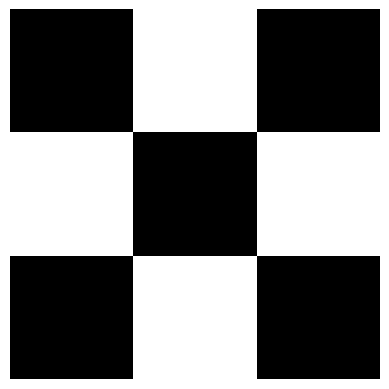

In [58]:
# Write your code to display the checkerboard image in grayscale.
display_image_grayscale(im)


In [59]:
# Print the type of the image array
print('The type is ', type(im))

# Print the shape of the array
print('The shape is ', im.shape)

# Print the minumum value
print('The min is ' , np.min(im))

# Print the maximum value
print('The max is ',np.max(im))


The type is  <class 'numpy.ndarray'>
The shape is  (18, 18)
The min is  0
The max is  255


## <font style="color:black">Color  Images</font>


In [60]:
# Read the color image "Mandrill.png and print its shape"
mandrill = cv2.imread("Mandrill.png") # note that the default is to read color images
print(mandrill.shape)

(968, 952, 3)


We notice that the shape is a 3D array to indicate the three color channels. Let's see what happens if the image is plotted.

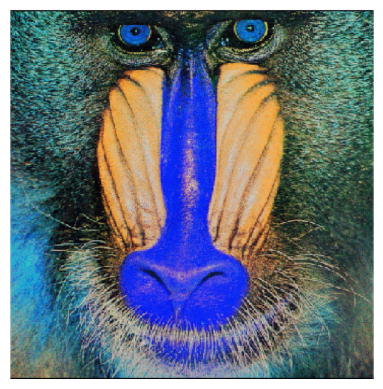

In [61]:
display_image_color(mandrill)

The image output doesn't look natural. This is because the order of RGB Channels is different. In OpenCV, reading the image returns an array in (B, G, R) format, previously popular among camera manufacturers and software developers.

We can change the color space with conversion code and the function `cvtColor` from the `cv2` library or by reversing the **dimensions** using `NumPy` indexing.

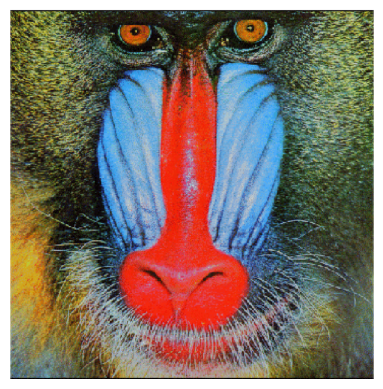

In [62]:
# Method 1: Using NumPy array reversing
mandrill_reversed = mandrill[:, :, ::-1]
display_image_color(mandrill_reversed)

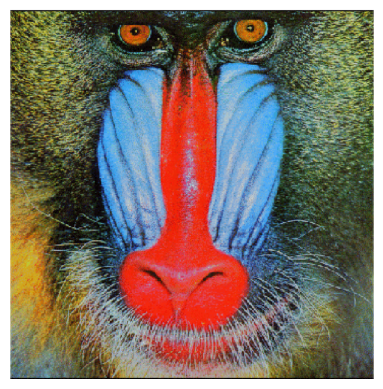

In [63]:
# Method 2: Using cvtColor from cv2 library
mandrill_rgb = cv2.cvtColor(mandrill, cv2.COLOR_BGR2RGB)
display_image_color(mandrill_rgb)

We can also use `cvtColor` to convert the image to grayscale. However, we still need to indicate the gray map when using `matplotlib.pyplot` to plot the image.

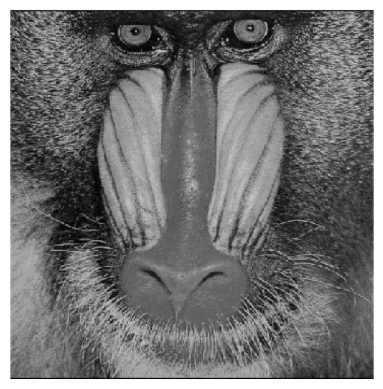

In [64]:
# Conversion to grayscale
mandrill_gray = cv2.cvtColor(mandrill, cv2.COLOR_BGR2GRAY)
display_image_grayscale(mandrill_gray)

***Color Channels***

We can also work with the different color channels. We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


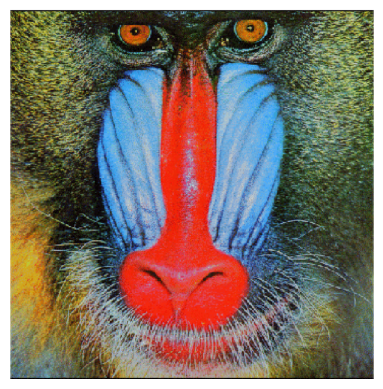

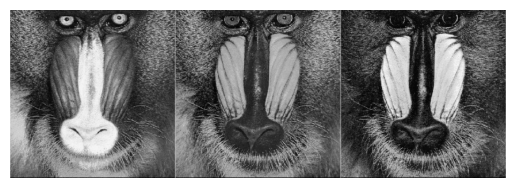

Color Channels: red (left), green(middle), blue(right)


In [65]:
red, green, blue  = mandrill_rgb[:, :, 0], mandrill_rgb[:, :, 1], mandrill_rgb[:, :, 2]
# red, green, blue = cv2.split(mandrill_rgb)  # Another way is to use cv2.split
mandrill_color_channels = cv2.hconcat([red, green, blue]) # Concatenate the three channels
display_image_color(mandrill_rgb)
display_image_grayscale(mandrill_color_channels)
print('Color Channels: red (left), green(middle), blue(right)')


We can also manipulate elements using indexing. In the following code, we create a new array `mandrill_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:

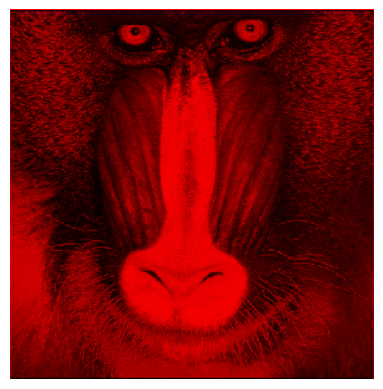

In [66]:
mandrill_red = mandrill_rgb.copy()
mandrill_red[:, :, 1] = 0
mandrill_red[:, :, 2] = 0
display_image_color(mandrill_red)

We can do the same for blue and green channels  


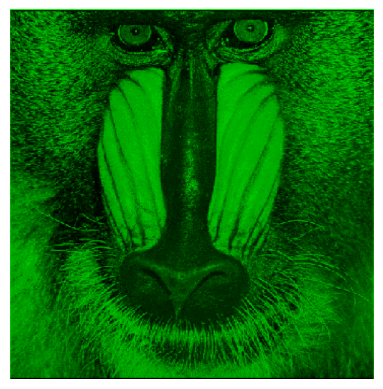

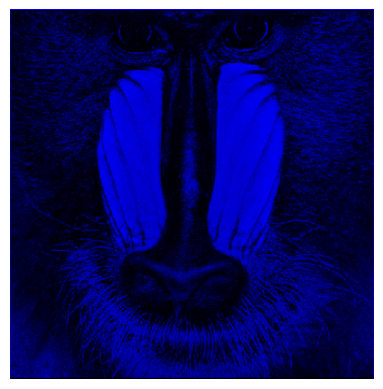

In [67]:
mandrill_green = mandrill_rgb.copy()
mandrill_green[:, :, 0] = 0
mandrill_green[:, :, 2] = 0
display_image_color(mandrill_green)

mandrill_blue = mandrill_rgb.copy()
mandrill_blue[:, :, 0] = 0
mandrill_blue[:, :, 1] = 0
display_image_color(mandrill_blue)

## <font style="color:black">Saving  Images</font>
You can use OpenCV *to* save images after processing. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).


### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path.

2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. **`Imwrite`**: <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce" target="_blank">Documentation link</a>

2. **`ImwriteFlags`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac" target="_blank">Documentation link</a>

In [68]:
# Saving or writing images. Let's save the three concatenated channels for Mandrill image
cv2.imwrite("mandrill_color_channels.png", mandrill_color_channels)
# Note that in, Google Colab, you should download the saved image if you want to keep it for later.

True

## <font color= "green"> Question 3 (4 Marks)</font>

Write codes to:
1. Read the image "lenna.png"
2. Display the image as a color image and as a grayscale image
3. Split the three color channels and display them as grayscale images
4. Copy the full color image to another variable and use what you learned about color channels to **remove the red channel (remove the red color from the image)** and leave the blue and green channels. Display the final image.

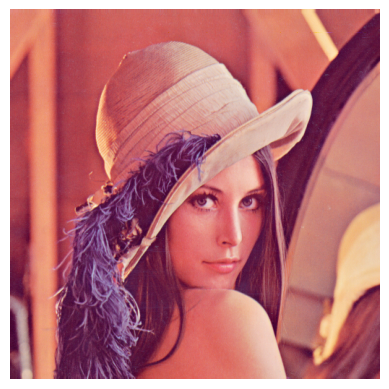

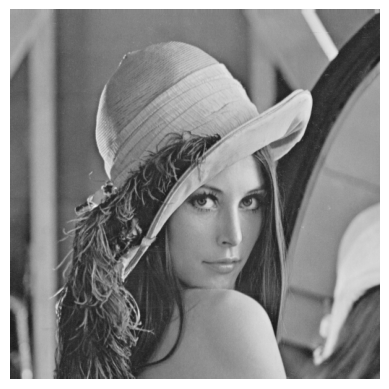

In [69]:
# Write your answer to question 3 in this cell
# 1. read image
lenna = cv2.imread('lenna.png')
# 2. display color and grey images
# convert to RGB from BGR
lennaRGB = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
display_image_color(lennaRGB)
lennaGrey = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
display_image_grayscale(lennaGrey)

Color Channels: Red (left), Green (middle), Blue (right)


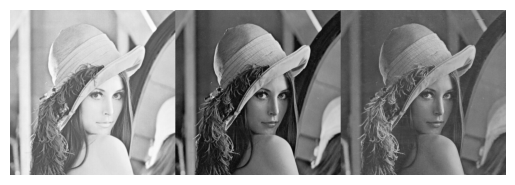

In [70]:
# 3. Split color channels
red, green, blue  = lennaRGB[:, :, 0], lennaRGB[:, :, 1], lennaRGB[:, :, 2]
lennaColorChannels = cv2.hconcat([red, green, blue])
print('Color Channels: Red (left), Green (middle), Blue (right)')
display_image_grayscale(lennaColorChannels)

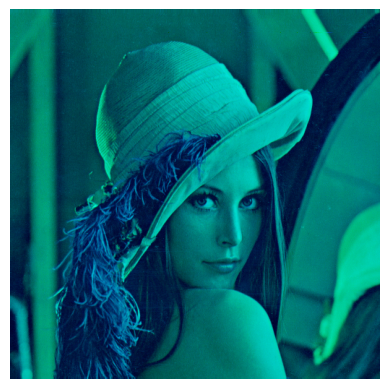

In [71]:
# 4. Remove red channel
lennaRedRemoved = lennaRGB.copy()
lennaRedRemoved[:, :, 0] = 0
display_image_color(lennaRedRemoved)

# <h2 align="left">**Part 2: Point Operations**

In this sections, we will apply what we learned in class about point operations on image processing.

## <font color="blue">Image Negative</font>
The image negative can be calculated using the formula:
\begin{equation*}
s = (L-1)-r
\end{equation*}
where $s$ is the output pixel, $r$ is the input pixel, and $L$ is the number of intensity levels.

## <font color= "green"> Question 4 (2 Marks)</font>
Write a code to read the image "barbra.png" *as a grayscale image*, calculate the image negative, and display them side by side.

In [72]:
# Write your solution to question 4 here
barbara = cv2.imread('barbara.png', 0)
barbaraNegative = 255 - barbara #255 is max possible, don't use image max, it might be low
ogAndNegative = cv2.hconcat([barbara, barbaraNegative])
print("Original (left), Negative (right)")
display_image_grayscale(ogAndNegative)



Original (left), Negative (right)


## <font color="blue">Histogram Equalization</font>

The histogram of an image is a graph that shows the distribution of pixel intensities in an image.

## <font color= "green"> Question 5 (3 Marks)</font>
Write a code to read the image `"pollen-lowcontrast.tif"` *as a grayscale image* and display it, then calculate the image histogram using three methods:

1.  The OpenCV method `cv.calcHist`  [Check online how to use it]
2.  The NumPy methood `np.histogram` [Check online how to use it and pay attention it requires a flattened array]
3.  Write your own function `calc_hist` that takes the image array as an input and resturns its histogram

Consider a histogram size of 256, i.e., 256 bins. It is better to use a bar plot to show your results; however, regular plots are also okay. All the three methods should give you the same results.




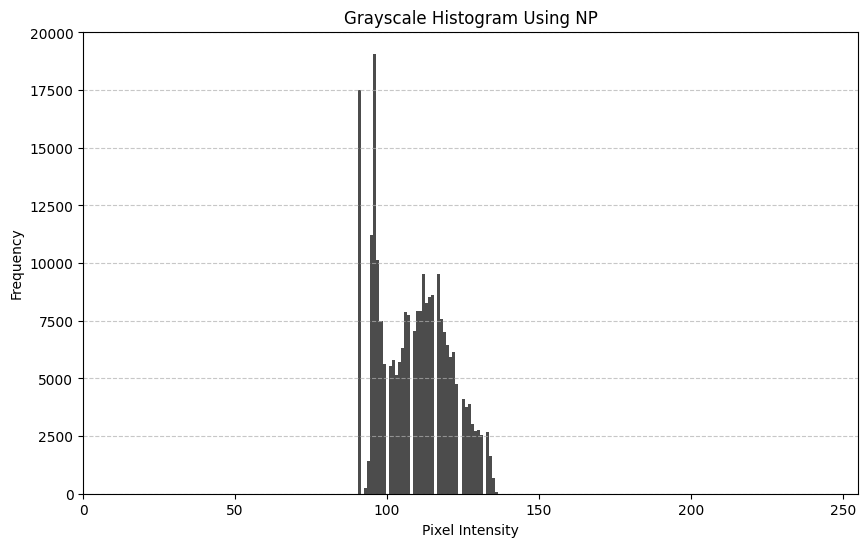

In [74]:
# Write your codes here to answer question 5

# Read and display "pollen-lowcontrast.tif" as a grayscale image.
pollen = cv2.imread("pollen-lowcontrast.tif", 0)
display_image_grayscale(pollen)


# 1. Calculate and plot the histogram using cv.calcHist
cvHist = cv2.calcHist([pollen], [0], None, [256], [0,256])
# Plot the histogram as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(256), cvHist[:, 0], width=1, color='black', alpha=0.7)
plt.title("Grayscale Histogram Using CV")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 2. Calculate and plot the histogram using np.histogram
npHistValues, npHistBins = np.histogram(pollen.flatten(), bins=256, range=(0,256))
# Plot the histogram as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(npHistBins[:-1], npHistValues, width=1, color='black', alpha=0.7)
plt.title("Grayscale Histogram Using NP")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 3. Write your own fuction calc_hist, call it, and plot your results
def calcHist(image):
  hist = np.zeros(256)
  for i in range(256):
    hist[i] = np.sum(image == i)
  return hist

myHist = calcHist(pollen)
# Plot historgram as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(256), myHist, width=1, color='black', alpha=0.7)
plt.title("Grayscale Histogram Using My Function")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




***Note:***

Matplotlib comes with a histogram plotting function, `matplotlib.pyplot.hist()`, which directly finds the histogram and plots it without using the `cv2.calcHist()` or `np.histogram()` function to **compute** the histogram. However, calculating the histogram separately is useful in the step of histogram equalization.

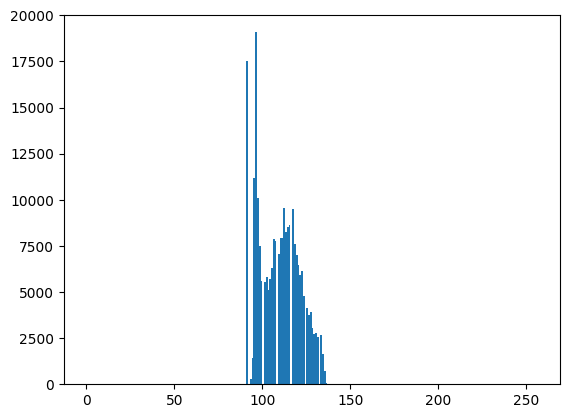

In [75]:
im_pollen = cv2.imread("pollen-lowcontrast.tif", 0)
plt.hist(im_pollen.flatten(), bins=256, range=(0,256)); plt.show()

**Histogram Equalization**

Histogram equalization is an automatic way that can be employed to enhance the contrast of an image.
We first calculate the normalzied histogram or the probability of each intensity level:
\begin{equation*}
p_r(r) = n_k/(MN)
\end{equation*}

Then, our transformation will be equal to the cumulative distribution function (CDF) multiplied by the maximum intensity level (L-1):
\begin{equation*}
s = T(r) = (L-1)\sum_{j=0}^{k} p_r(r_j), k = 0,1,2, .., L-1
\end{equation*}
Don't forget to round to the nearest integer when applying your transformation to the image.

## <font color= "green"> Question 6 (5 Marks)</font>
We will continue to work on the `"pollen-lowcontrast.tif"` image. Use the histogram you calculated by any of the three methods in Question 5 and do the following:
1. Calculate the normalized histogram.
2. Calculate the CDF and the mapping T(r) using the above equation.
3. Apply this mapping to your low-contrast image and display the result alongside the original image.
4. Plot, side by side or on the same plot, the histogram of the original and the new images.
5. Apply the built-in openCV function `cv2.equalizeHist()` to the original image and verify that it gives you the same result you got with your code.

Original (left), Equalized (right)


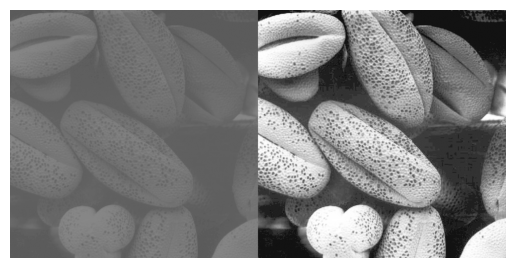

Equalized with my Code (left), Equalized with OpenCV Function (right)


In [76]:
# Write your answer to question 6 here

# 1. Calculate the normalized histogram.
M, N = pollen.shape # Image dimensions
normalizedHist = cvHist/(M*N)

# 2. Calculate the CDF and the mapping T(r) using the above equation.
cdf = np.cumsum(normalizedHist)
L = 256
T_r = np.round((L-1) *cdf).astype(np.uint8)

# 3. Apply this mapping to your low-contrast image and display the result alongside the original image.
pollenEqualized = T_r[pollen]
ogAndEqual = cv2.hconcat([pollen, pollenEqualized])
print("Original (left), Equalized (right)")
display_image_grayscale(ogAndEqual)

# 4. Plot, side by side or on the same plot, the histogram of the original and the new images.
plt.figure(figsize=(10, 6))
plt.bar(range(256), cvHist.ravel(), width=1, color="black", alpha=0.7)
plt.title("Original Histogram")
plt.xlim([0, 255])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

equalizedHist = cv2.calcHist([pollenEqualized], [0], None, [256], [0,256])

plt.figure(figsize=(10, 6))
plt.bar(range(256), equalizedHist.ravel(), width=1, color="black", alpha=0.7)
plt.title("Equalized Histogram")
plt.xlim([0, 255])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 5. Apply the built-in openCV function cv2.equalizeHist() to the original image and verify that it gives you the same result you got with your code.
cvPollenEqualized = cv2.equalizeHist(pollen)
ogAndEqualCV = cv2.hconcat([pollenEqualized, cvPollenEqualized])
print("Equalized with my Code (left), Equalized with OpenCV Function (right)")
display_image_grayscale(ogAndEqualCV)


## <font color= "green"> Question 7 (2 Marks)</font>
How do you describe the image histogram after performing the histogram equalization? Why does this histogram indicate a better contrast image?

Answer: Histogram equalization distributes intensity values (0 to 255) more evenly. The original historgram is concentrated/narrow which indicates low contrast. Histogram equalization produces better contrast by covering a broader range of pixel intensities that are more uniformly distributed.

In [ ]:
%pip install nbconvert

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc.

In [79]:
!jupyter nbconvert --to pdf ENEL503_Lab1.ipynb

[NbConvertApp] Converting notebook ENEL503_Lab1.ipynb to pdf
[NbConvertApp] Support files will be in ENEL503_Lab1_files/
[NbConvertApp] Making directory ./ENEL503_Lab1_files
[NbConvertApp] Writing 76930 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3174121 bytes to ENEL503_Lab1.pdf
